In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('wine-clustering.csv')

In [3]:
df

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [4]:
njejel = df[["Alcohol", "Malic_Acid"]]
njejel 

,Alcohol,Malic_Acid
0,14.23,1.71
1,13.20,1.78
2,13.16,2.36
3,14.37,1.95
4,13.24,2.59
...,...,...
173,13.71,5.65
174,13.40,3.91
175,13.27,4.28
176,13.17,2.59


In [5]:
scaler = StandardScaler()
df[["Alcohol", "Malic_Acid"]] = scaler.fit_transform(df[["Alcohol", "Malic_Acid"]])

In [6]:
df[["Alcohol", "Malic_Acid"]]

,Alcohol,Malic_Acid
0,1.518613,-0.562250
1,0.246290,-0.499413
2,0.196879,0.021231
3,1.691550,-0.346811
4,0.295700,0.227694
...,...,...
173,0.876275,2.974543
174,0.493343,1.412609
175,0.332758,1.744744
176,0.209232,0.227694


In [7]:
def jumlah_centroid(data, max_k):
    means = []
    inertia = []
    
    for i in range(1, max_k):
        kmeans = KMeans(n_clusters = i)
        kmeans.fit(data)
        
        means.append(i)
        inertia.append(kmeans.inertia_)
        
    plt.plot(means, inertia, '-o')
    plt.grid()

C:\Users\Ulin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Ulin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Ulin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Ulin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `

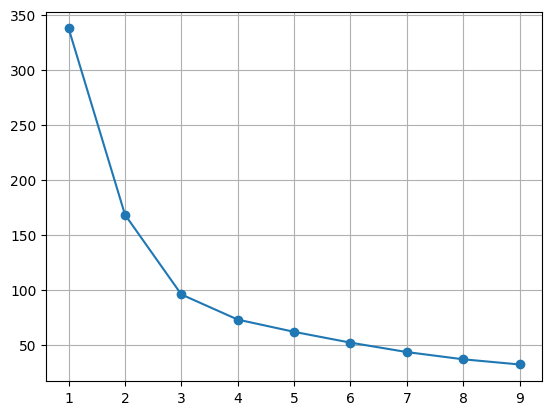

In [8]:
jumlah_centroid(njejel, 10)

In [9]:
kmeans = KMeans(n_clusters=4)

In [10]:
kmeans.fit(njejel)


C:\Users\Ulin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [11]:
njejel['kmeans_4'] = kmeans.labels_

C:\Users\Ulin\AppData\Local\Temp\ipykernel_5676\1718024144.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  njejel['kmeans_4'] = kmeans.labels_


In [12]:
njejel

,Alcohol,Malic_Acid,kmeans_4
0,14.23,1.71,1
1,13.20,1.78,1
2,13.16,2.36,0
3,14.37,1.95,1
4,13.24,2.59,0
...,...,...,...
173,13.71,5.65,3
174,13.40,3.91,3
175,13.27,4.28,3
176,13.17,2.59,0


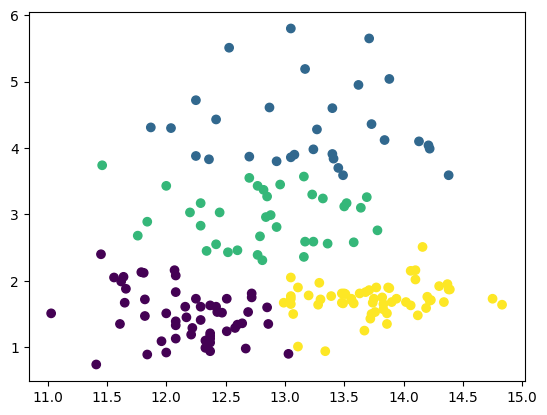

In [13]:
plt.scatter(njejel["Alcohol"], njejel["Malic_Acid"], c=njejel["kmeans_4"])